In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy as np



In [87]:
df=pd.read_csv("/content/MAC.csv")
df

,Target\t\t\t\t
0,"""I feel guilty when when I realize that I cons..."
1,After my girlfriend had taken her exam we went...
2,"When, for the first time I realized the meanin..."
3,When a car is overtaking another and I am forc...
4,When I recently thought about the hard work it...
5,When I found a bristle in the liver paste tube...
6,"When I was tired and unmotivated, I shouted at..."
7,When I think that I do not study enough. Afte...
8,When I pass an examination which I did not thi...
9,When one has arranged to meet someone and that...


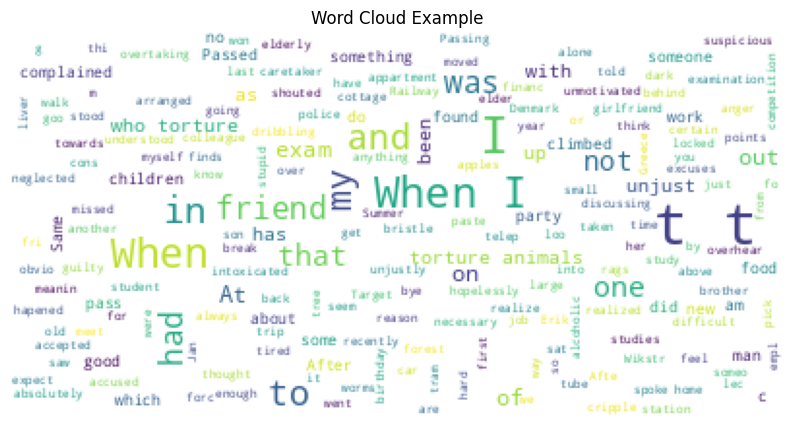

In [90]:
wordcloud = WordCloud(stopwords={"is", "a", "an", "the"}, background_color="white", max_words=500, max_font_size=30).generate(str(df))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud Example")
plt.show()

In [ ]:
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pip install clifs

In [ ]:
import clifs

In [ ]:
def read_data(file):
    data = []
    with open(file, 'r')as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data.append([label, text])
    return data

In [ ]:
file = 'text.txt'
data = read_data(file)
print("Number of instances: {}".format(len(data)))

Number of instances: 7480


In [ ]:
def ngram(token, n):
    output = []
    for i in range(n-1, len(token)):
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram)
    return output

In [ ]:
def create_feature(text, nrange=(1, 1)):
    text_features = []
    text = text.lower()
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1):
        text_features += ngram(text_alphanum.split(), n)
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    return Counter(text_features)

In [ ]:
def convert_label(item, name):
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)):
        if items[idx] == 1:
            label += name[idx] + " "

    return label.strip()

In [ ]:
emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in data:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 123)

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc


In [ ]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
# train and test them
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))

clifs = [LogisticRegression(), KNeighborsClassifier(), SVC()]

for clf in clifs:
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.4f} | {:13.4f} |".format(clf_name, train_acc, test_acc))

| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


| LogisticRegression        |            0.9988 |        0.5749 |
| KNeighborsClassifier      |            0.4888 |        0.2467 |
| SVC                       |            0.9068 |        0.4512 |


In [ ]:
l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
label_freq = {}
for label, _ in data:
    label_freq[label] = label_freq.get(label, 0) + 1

# print the labels and their counts in sorted order
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

joy       (1. 0. 0. 0. 0. 0. 0.)  1084
anger     (0. 0. 1. 0. 0. 0. 0.)  1080
sadness   (0. 0. 0. 1. 0. 0. 0.)  1079
fear      (0. 1. 0. 0. 0. 0. 0.)  1078
disgust   (0. 0. 0. 0. 1. 0. 0.)  1057
guilt     (0. 0. 0. 0. 0. 0. 1.)  1057
shame     (0. 0. 0. 0. 0. 1. 0.)  1045


In [ ]:
emoji_dict = {"joy":"😂", "fear":"😱", "anger":"😠", "sadness":"😢", "disgust":"😒", "shame":"😳", "guilt":"😳"}
t1 = "This looks so impressive"
t2 = "I have a fear of dogs"
t3 = "My dog died yesterday"
t4 = "I don't love you anymore..!"

texts = [t1, t2, t3, t4]
for text in texts:
    features = create_feature(text, nrange=(1, 4))
    features = vectorizer.transform(features)
    prediction = clf.predict(features)[0]
    print( text,emoji_dict[prediction])

This looks so impressive 😒
I have a fear of dogs 😱
My dog died yesterday 😢
I don't love you anymore..! 😳
